In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
deliveries = pd.read_csv('/content/deliveries.csv')

In [3]:
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [4]:
deliveries.isnull().sum()


match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    1
ball                    1
batsman                 1
non_striker             1
bowler                  1
is_super_over           1
wide_runs               1
bye_runs                1
legbye_runs             1
noball_runs             1
penalty_runs            1
batsman_runs            1
extra_runs              1
total_runs              1
player_dismissed    29405
dismissal_kind      29405
fielder             29858
dtype: int64

In [5]:
# prompt: find info

deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31012 entries, 0 to 31011
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          31012 non-null  int64  
 1   inning            31012 non-null  int64  
 2   batting_team      31012 non-null  object 
 3   bowling_team      31012 non-null  object 
 4   over              31011 non-null  float64
 5   ball              31011 non-null  float64
 6   batsman           31011 non-null  object 
 7   non_striker       31011 non-null  object 
 8   bowler            31011 non-null  object 
 9   is_super_over     31011 non-null  float64
 10  wide_runs         31011 non-null  float64
 11  bye_runs          31011 non-null  float64
 12  legbye_runs       31011 non-null  float64
 13  noball_runs       31011 non-null  float64
 14  penalty_runs      31011 non-null  float64
 15  batsman_runs      31011 non-null  float64
 16  extra_runs        31011 non-null  float6

In [6]:
deliveries.fillna(0, inplace=True)


In [7]:
deliveries.duplicated().sum()




0

In [8]:
deliveries.drop_duplicates(inplace=True)


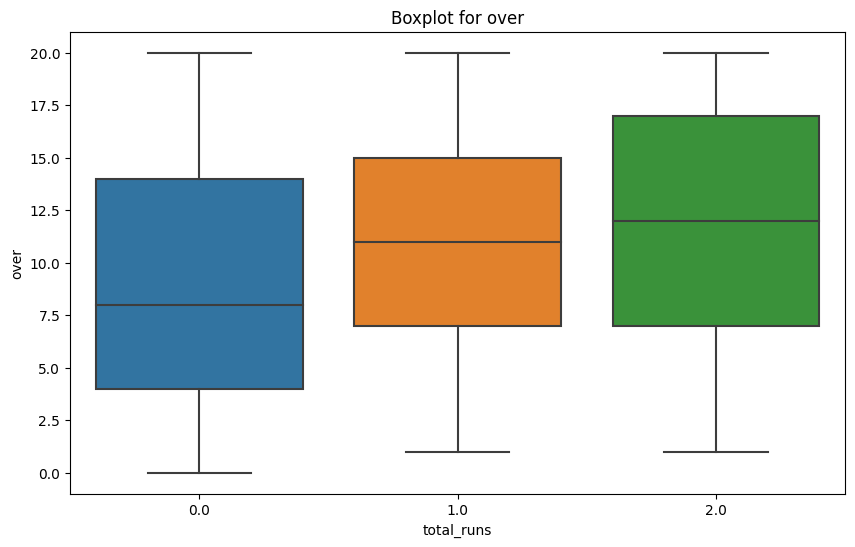

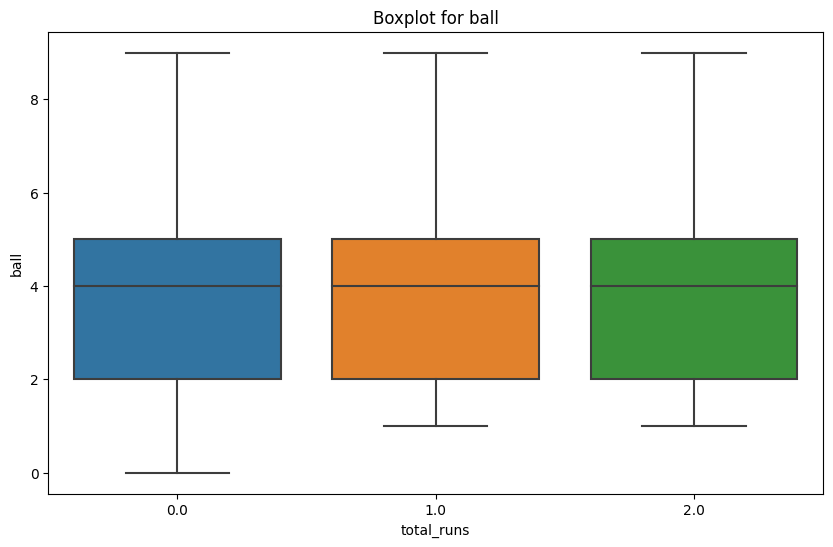

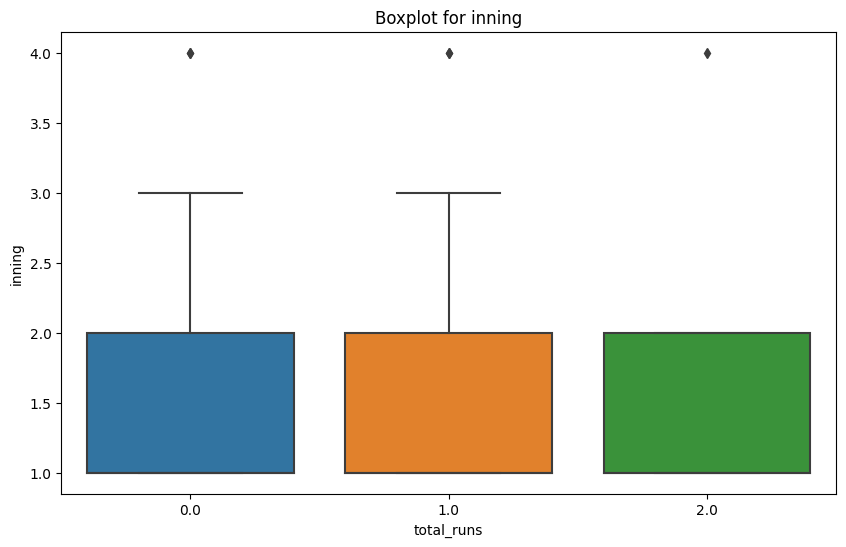

In [30]:
# Box plots for numerical columns
numerical_columns = ['over', 'ball', 'inning']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='total_runs', y=column, data=deliveries)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [31]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(deliveries, column):
    Q1 = deliveries[column].quantile(0.25)
    Q3 = deliveries[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_outliers_removed = deliveries[(deliveries[column] >= lower_bound) & (deliveries[column] <= upper_bound)]
    return df_outliers_removed

# Remove outliers for specific numerical columns
numerical_columns = ['over', 'ball', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
                      'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']

for column in numerical_columns:
    deliveries = remove_outliers_iqr(deliveries, column)

# Display the DataFrame after removing outliers
print(deliveries)

       match_id  inning           batting_team                 bowling_team  \
0             1       1    Sunrisers Hyderabad  Royal Challengers Bangalore   
1             1       1    Sunrisers Hyderabad  Royal Challengers Bangalore   
3             1       1    Sunrisers Hyderabad  Royal Challengers Bangalore   
5             1       1    Sunrisers Hyderabad  Royal Challengers Bangalore   
7             1       1    Sunrisers Hyderabad  Royal Challengers Bangalore   
...         ...     ...                    ...                          ...   
31005       134       1  Kolkata Knight Riders  Royal Challengers Bangalore   
31008       134       1  Kolkata Knight Riders  Royal Challengers Bangalore   
31009       134       1  Kolkata Knight Riders  Royal Challengers Bangalore   
31010       134       1  Kolkata Knight Riders  Royal Challengers Bangalore   
31011       134       1  Kolkata Knight Riders                  Royal Chall   

       over  ball    batsman non_striker        bow

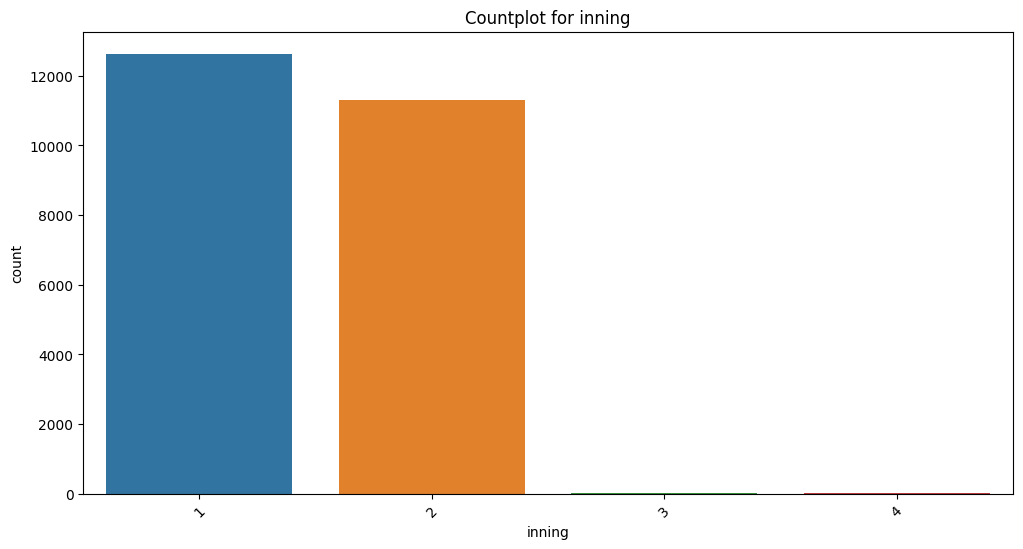

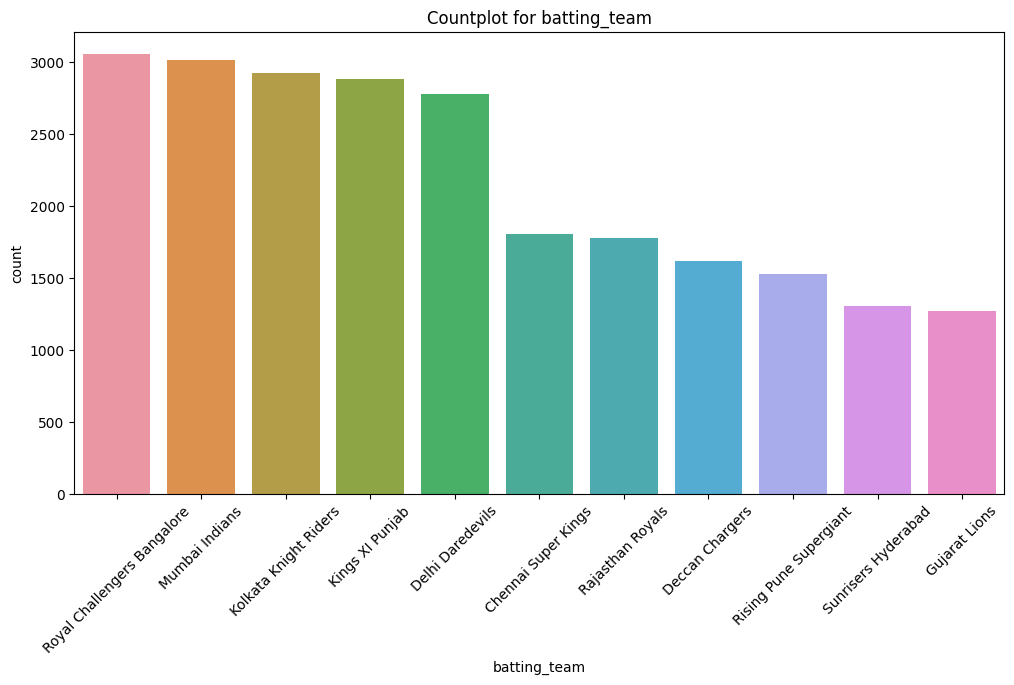

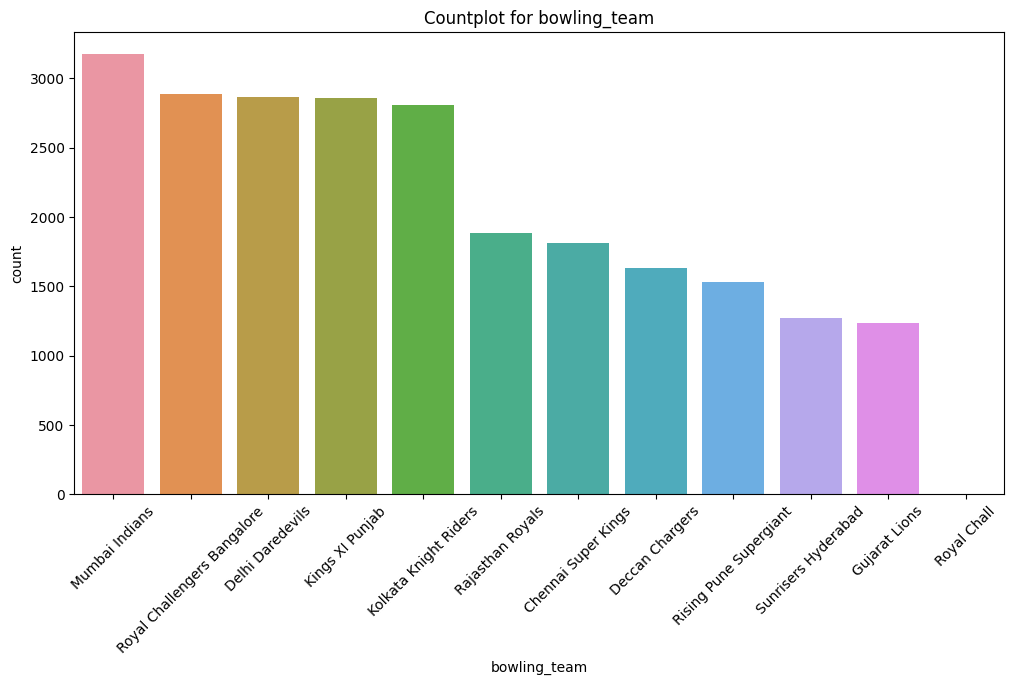

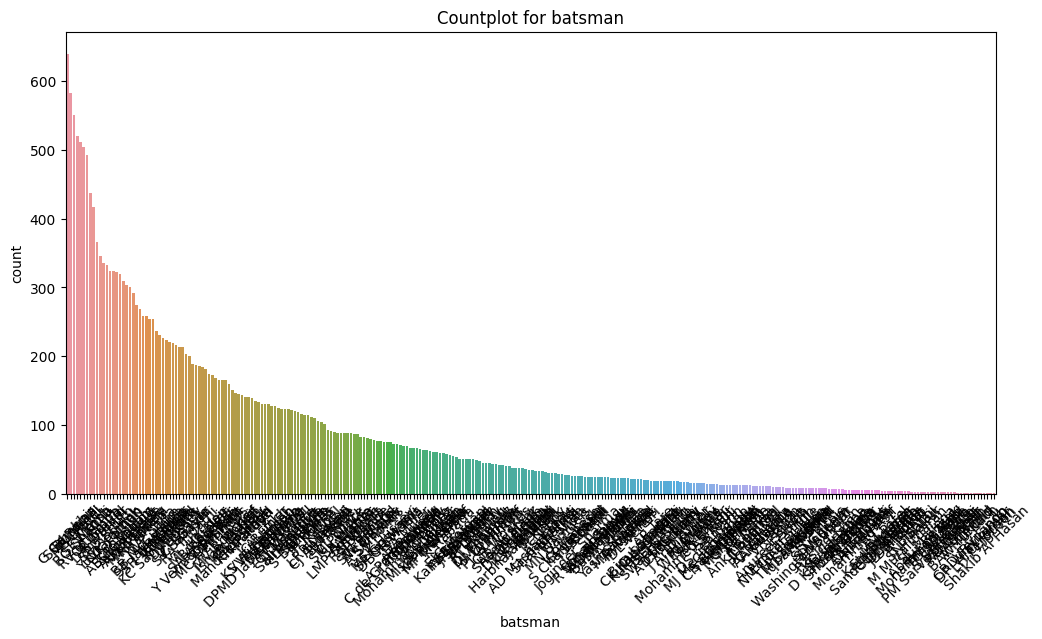

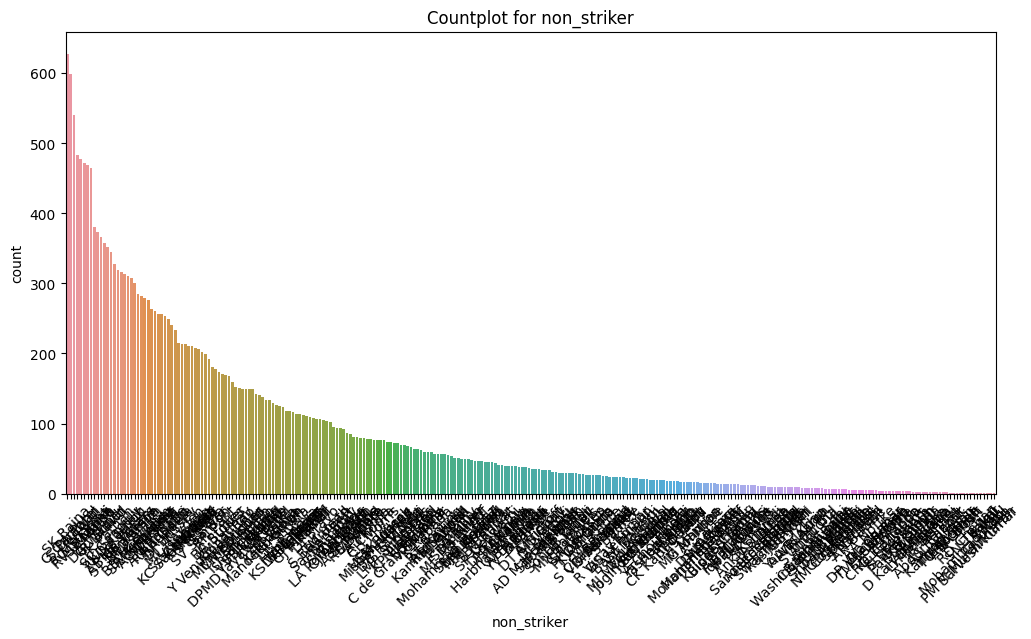

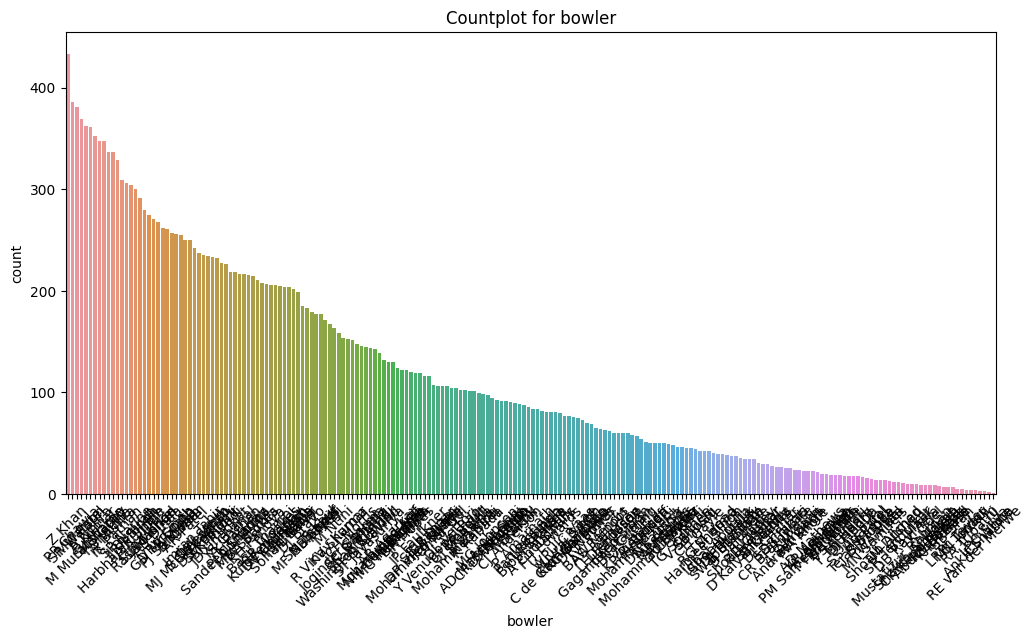

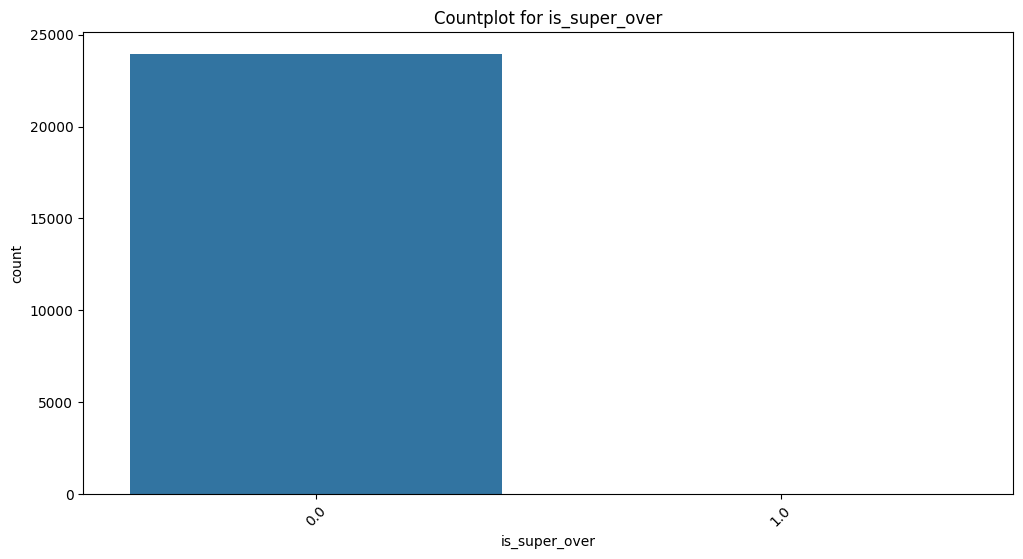

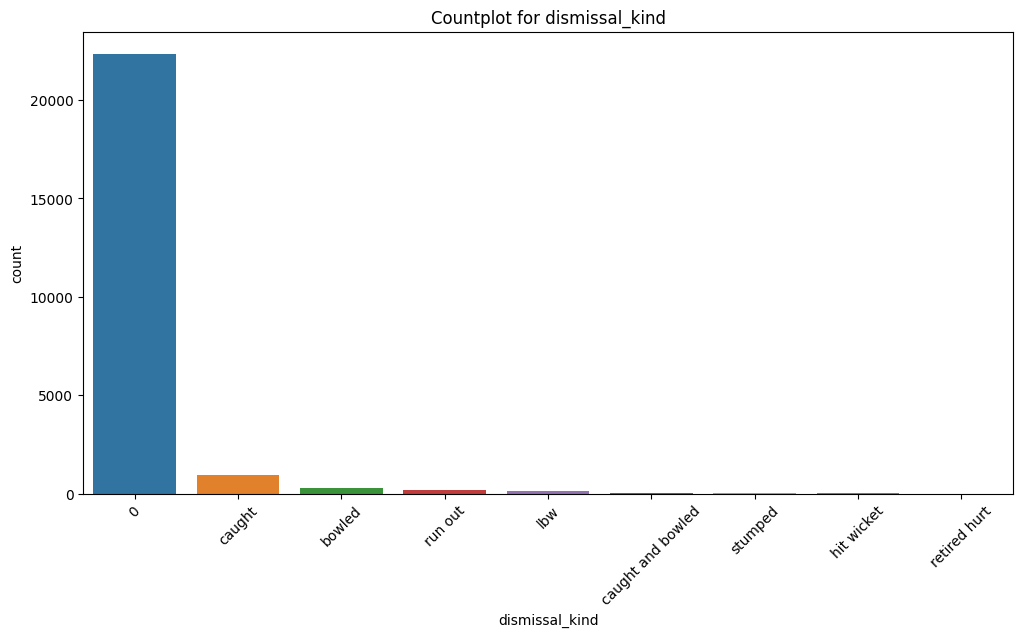

In [20]:
categorical_columns = ['inning', 'batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler',
                        'is_super_over', 'dismissal_kind']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=deliveries, order=deliveries[column].value_counts().index)
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=45)
    plt.show()


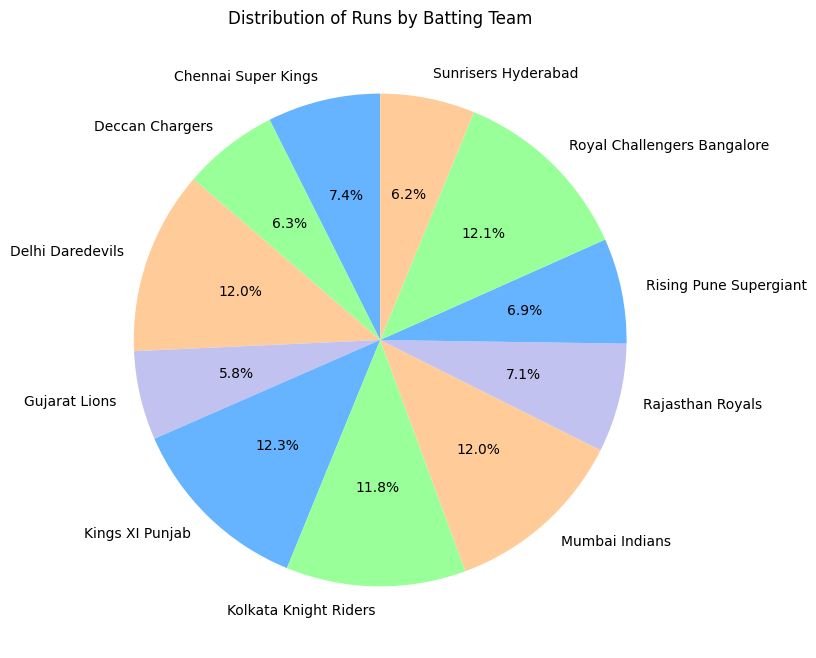

In [21]:
# Group by batting team and calculate the total runs
team_runs = deliveries.groupby('batting_team')['total_runs'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(team_runs['total_runs'], labels=team_runs['batting_team'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Distribution of Runs by Batting Team')
plt.show()

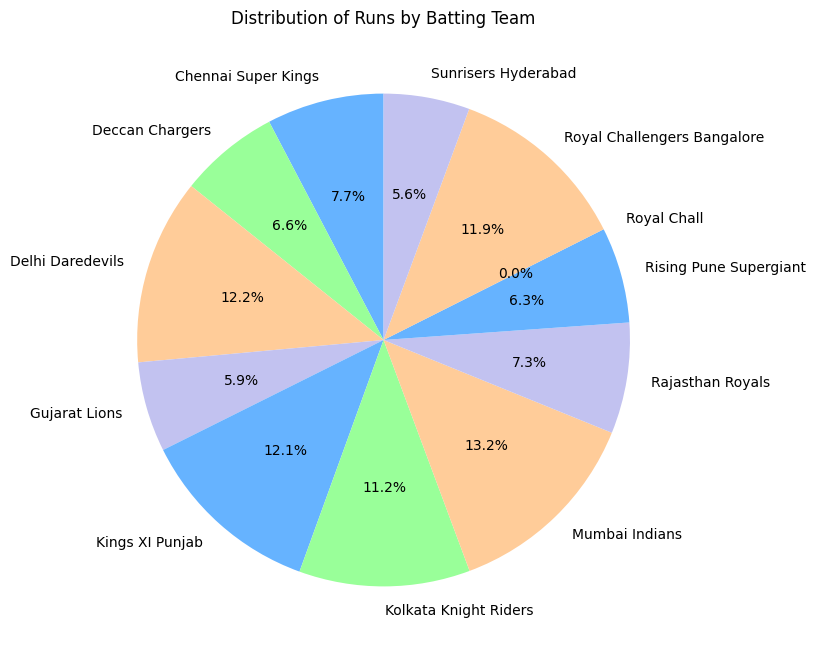

In [13]:
# Group by batting team and calculate the total runs
team_runs = deliveries.groupby('bowling_team')['total_runs'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(team_runs['total_runs'], labels=team_runs['bowling_team'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Distribution of Runs by Batting Team')
plt.show()

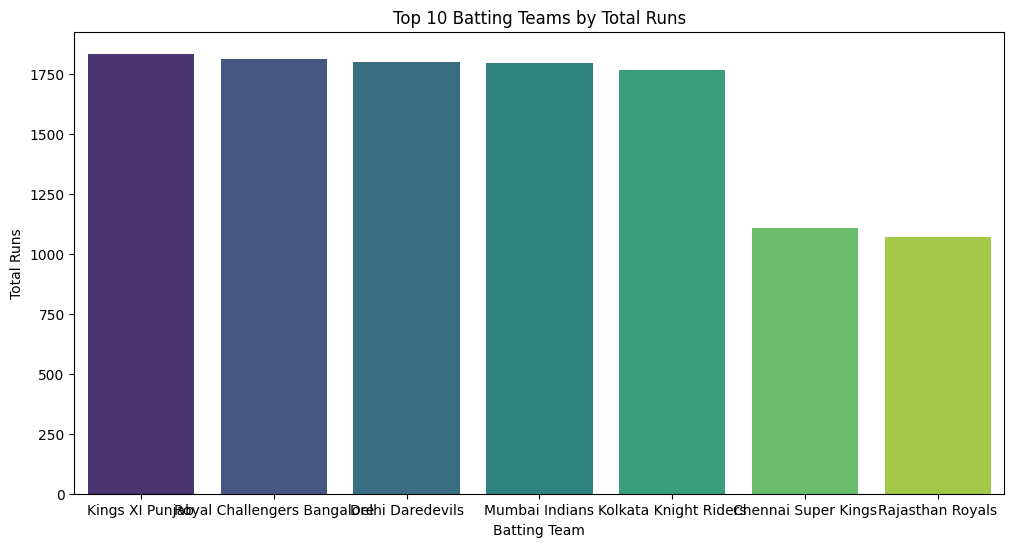

In [14]:
# Group by batting team and calculate the total runs
team_runs = deliveries.groupby('batting_team')['total_runs'].sum().reset_index()

# Sort the DataFrame by total runs in descending order
team_runs_sorted = team_runs.sort_values(by='total_runs', ascending=False)

# Select the top 10 teams
top_teams = team_runs_sorted.head(7)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='total_runs', data=top_teams, palette='viridis')
plt.title('Top 10 Batting Teams by Total Runs')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.show()

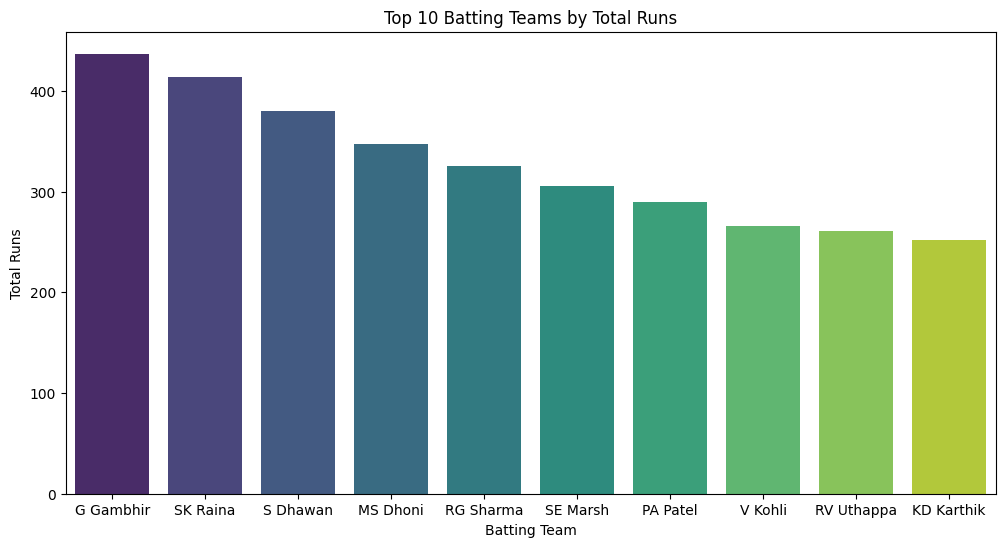

In [15]:
# Group by batting team and calculate the total runs
team_runs = deliveries.groupby('batsman')['total_runs'].sum().reset_index()

# Sort the DataFrame by total runs in descending order
team_runs_sorted = team_runs.sort_values(by='total_runs', ascending=False)

# Select the top 10 teams
top_teams = team_runs_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman', y='total_runs', data=top_teams, palette='viridis')
plt.title('Top 10 Batting Teams by Total Runs')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.show()

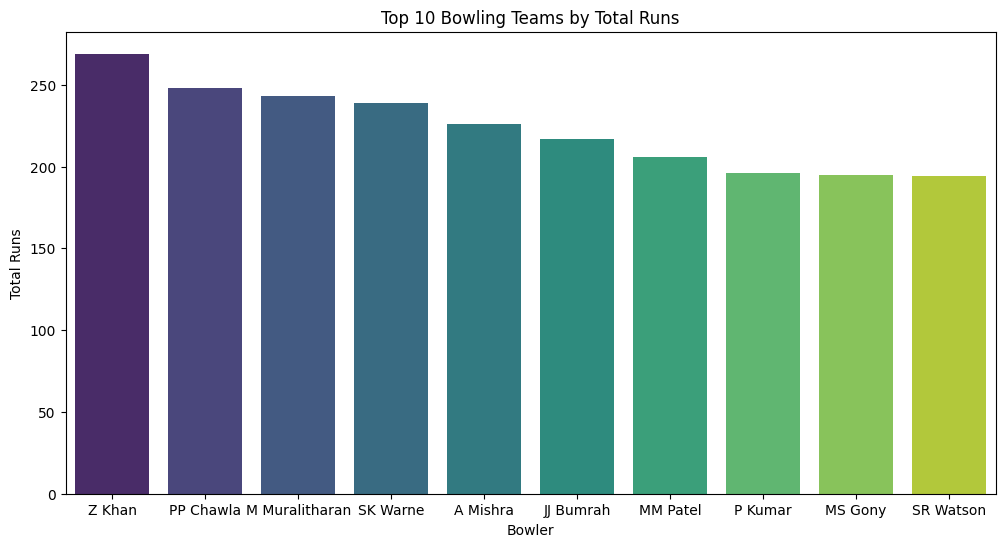

In [32]:
# Group by batting team and calculate the total runs
team_runs = deliveries.groupby('bowler')['total_runs'].sum().reset_index()

# Sort the DataFrame by total runs in descending order
team_runs_sorted = team_runs.sort_values(by='total_runs', ascending=False)

# Select the top 10 teams
top_teams = team_runs_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='total_runs', data=top_teams, palette='viridis')
plt.title('Top 10 Bowling Teams by Total Runs')
plt.xlabel('Bowler')
plt.ylabel('Total Runs')
plt.show()

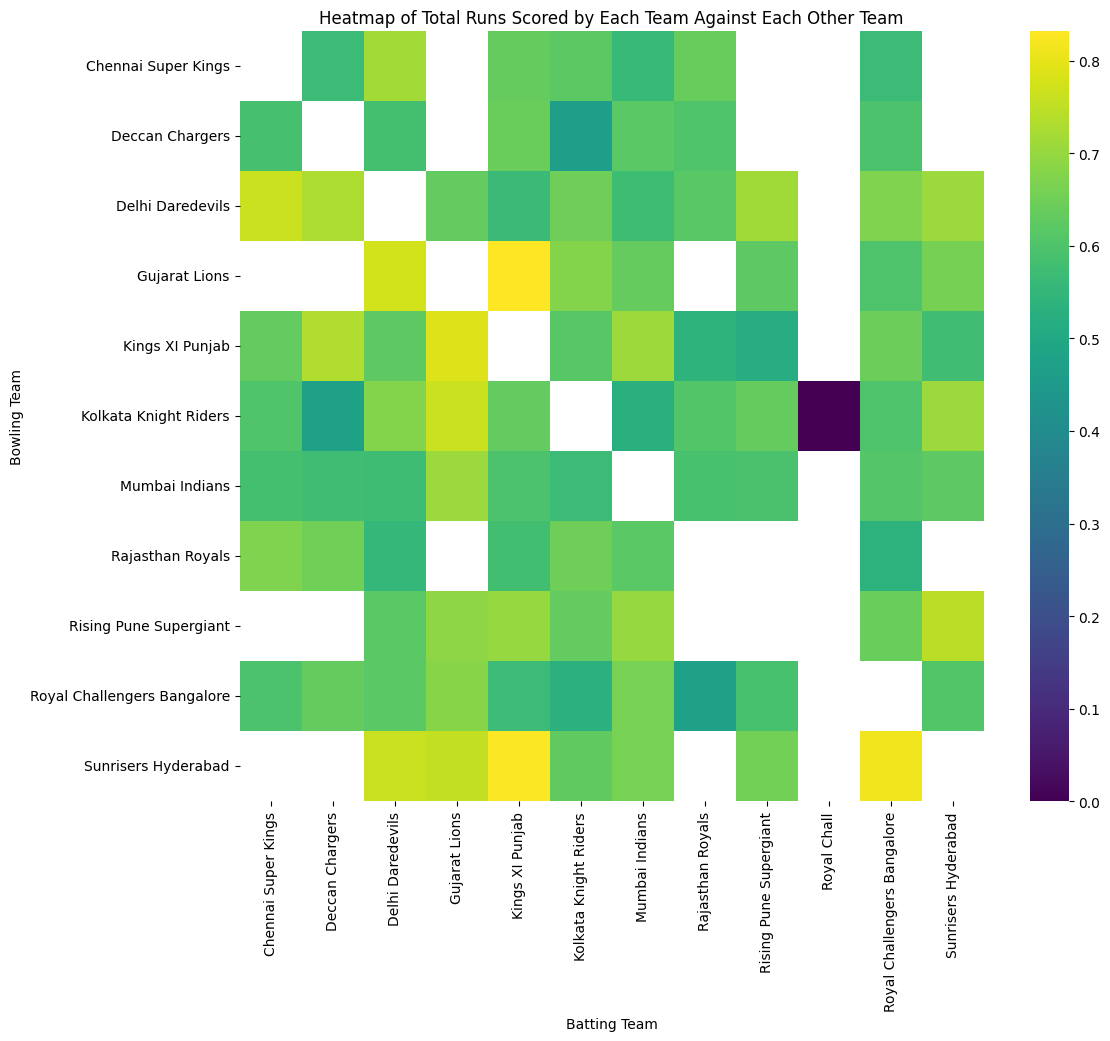

In [33]:
# Create a heatmap of the total runs scored by each team against each other team
plt.figure(figsize=(12, 10))
sns.heatmap(deliveries.pivot_table(index='batting_team', columns='bowling_team', values='total_runs'), cmap='viridis')
plt.title('Heatmap of Total Runs Scored by Each Team Against Each Other Team')
plt.xlabel('Batting Team')
plt.ylabel('Bowling Team')
plt.show()


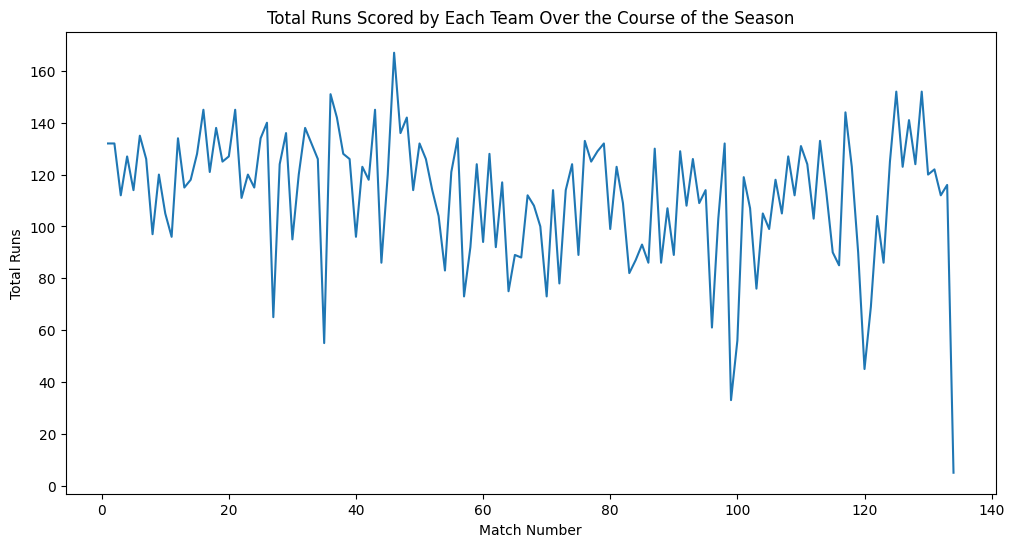

In [40]:
# prompt: more data visualization

# Create a line chart of the total runs scored by each team over the course of the season
plt.figure(figsize=(12, 6))
sns.lineplot(x='match_id', y='total_runs', data=deliveries.groupby('match_id')['total_runs'].sum().reset_index())
plt.title('Total Runs Scored by Each Team Over the Course of the Season')
plt.xlabel('Match Number')
plt.ylabel('Total Runs')
plt.show()


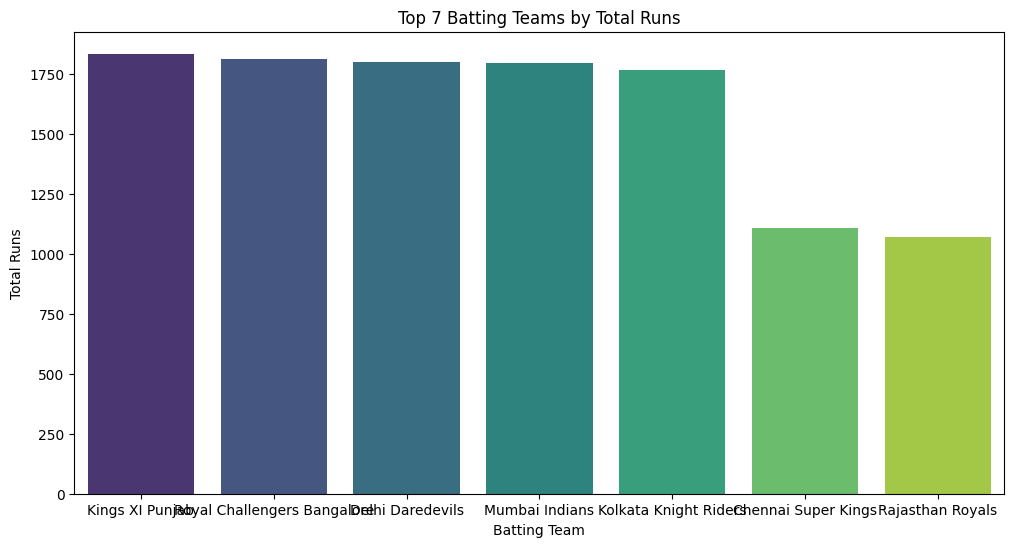

In [55]:
team_runs = deliveries.groupby('batting_team')['total_runs'].sum().reset_index()
team_runs_sorted = team_runs.sort_values(by='total_runs', ascending=False)
top_teams = team_runs_sorted.head(7)
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='total_runs', data=top_teams, palette='viridis')
plt.title('Top 7 Batting Teams by Total Runs')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.show()


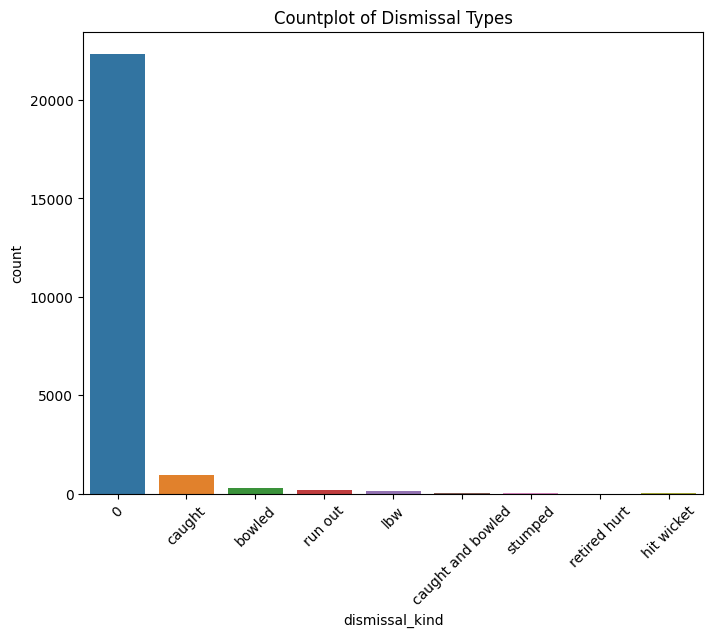

In [63]:
# prompt: plot player dissmissed

plt.figure(figsize=(8, 6))
sns.countplot(x='dismissal_kind', data=deliveries)
plt.title('Countplot of Dismissal Types')
plt.xticks(rotation=45)
plt.show()
